# The Sparks Foundation

### Task 1 - Prediction using Supervised ML

##### To predict the percenatge of marks of the student based on thenumber of hours they studied.

##### By - Sneha Jha

##### Import Packages

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


##### Reading Data

In [17]:
data = pd.read_csv("http://bit.ly/w-data")
data.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [18]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [19]:
data.describe

<bound method NDFrame.describe of     Hours  Scores
0     2.5      21
1     5.1      47
2     3.2      27
3     8.5      75
4     3.5      30
5     1.5      20
6     9.2      88
7     5.5      60
8     8.3      81
9     2.7      25
10    7.7      85
11    5.9      62
12    4.5      41
13    3.3      42
14    1.1      17
15    8.9      95
16    2.5      30
17    1.9      24
18    6.1      67
19    7.4      69
20    2.7      30
21    4.8      54
22    3.8      35
23    6.9      76
24    7.8      86>

### Data Pre-processing

#### Missing NULL values

In [20]:
data.isnull().sum()

Hours     0
Scores    0
dtype: int64

#### There is no null value in the dataset.   

## Data Visualization

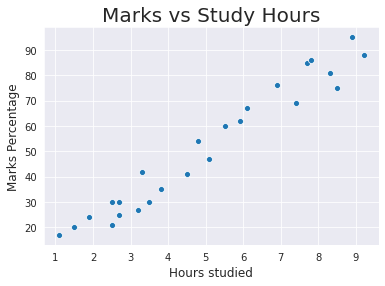

In [21]:
sns.set_style('darkgrid')
sns.scatterplot(y=data["Scores"],x=data["Hours"])
plt.title("Marks vs Study Hours", size=20)
plt.ylabel('Marks Percentage',size=12)
plt.xlabel('Hours studied',size=12)
plt.show()

#### Observation - There is a positive correlation between "Marks precenatge" vs "Hours studied"

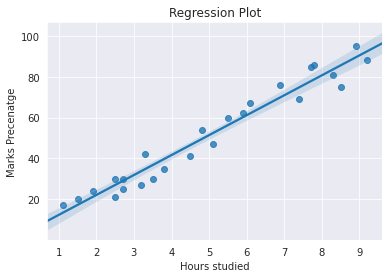

           Hours    Scores
Hours   1.000000  0.976191
Scores  0.976191  1.000000


In [22]:
sns.regplot(x=data['Hours'], y=data['Scores'])
plt.title('Regression Plot')
plt.ylabel('Marks Precenatge')
plt.xlabel("Hours studied")
plt.show()
print(data.corr())

## Training the Model

In [23]:
## Defining x and y from the data
x= data.iloc[:, :-1].values
y= data.iloc[:,1].values

In [24]:
## Splitting the data 
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, random_state=0)

## Fitting the data into the model

In [25]:
from sklearn.linear_model import LinearRegression
reg_model = LinearRegression()
reg_model.fit(x_train,y_train)
print("Model Trained")

Model Trained


## Predicting the Percenatge of Marks

In [27]:
pred_y = reg_model.predict(x_test)
pred_y

array([16.84472176, 33.74557494, 75.50062397, 26.7864001 , 60.58810646,
       39.71058194, 20.8213931 ])

In [28]:
### Comparison between the predicted marks and actual marks
scores_compare = pd.DataFrame({'Actual Marks': y_test, 'Predicted Marks': pred_y})
scores_compare

,Actual Marks,Predicted Marks
0,20,16.844722
1,27,33.745575
2,69,75.500624
3,30,26.786400
4,62,60.588106
5,35,39.710582
6,24,20.821393


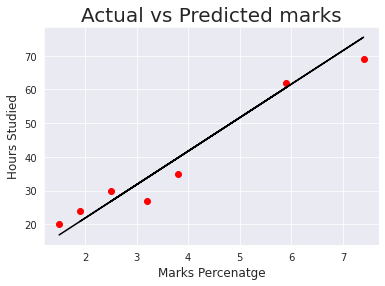

In [37]:
plt.scatter(x=x_test,y= y_test,color='red')
plt.plot(x_test,pred_y,color="black")
plt.title("Actual vs Predicted marks",size=20)
plt.xlabel("Marks Percenatge",size=12)
plt.ylabel("Hours Studied",size=12)
plt.show()

## Evaluating the Model

In [39]:
# calculating the accuracy of model
from sklearn.metrics import mean_absolute_error
print("Mean Absolute Error",mean_absolute_error(y_test,pred_y))

Mean Absolute Error 4.130879918502482


### What will be predicted score if a student studies for 9.25 hrs/ day?


In [48]:
hours=[9.25]
answer= reg_model.predict([hours])
print("Score:{}".format(round(answer[0],2)))

Score:93.89


## Observations : According to the regression model if a student studies for 9.25 hours a day he/she is likely to score 93.89 marks.

# Thank you!!